In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [20]:
# initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (100,100,3)

data = []
labels = []

In [21]:
# load image files from the dataset
image_files = [f for f in glob.glob(r'C:\Users\Md Moradul Siddique\Documents\data\gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [22]:
# converting images to arrays and labelling the categories
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # C:\Files\gender_dataset_face\woman\face_1162.jpg
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]

In [25]:
# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [26]:
# split dataset for training and validation
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

In [27]:
Y_train = to_categorical(Y_train, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
Y_test = to_categorical(Y_test, num_classes=2)

In [30]:
# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [31]:
# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

In [32]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [35]:

# train the model
H = model.fit_generator(aug.flow(X_train, Y_train, batch_size=batch_size),
                        validation_data=(X_test,Y_test),
                        steps_per_epoch=len(X_train) // batch_size,
                        epochs=epochs, verbose=1)

Epoch 1/100
28/28 [==============================] - 58s 2s/step - loss: 0.4991 - accuracy: 0.8108 - val_loss: 1.7831 - val_accuracy: 0.4697
Epoch 2/100
28/28 [==============================] - 58s 2s/step - loss: 0.4208 - accuracy: 0.8271 - val_loss: 1.7661 - val_accuracy: 0.4697
Epoch 3/100
28/28 [==============================] - 57s 2s/step - loss: 0.3795 - accuracy: 0.8501 - val_loss: 2.2750 - val_accuracy: 0.4697
Epoch 4/100
28/28 [==============================] - 54s 2s/step - loss: 0.3382 - accuracy: 0.8669 - val_loss: 1.4036 - val_accuracy: 0.4697
Epoch 5/100
28/28 [==============================] - 53s 2s/step - loss: 0.3248 - accuracy: 0.8821 - val_loss: 1.4042 - val_accuracy: 0.4697
Epoch 6/100
28/28 [==============================] - 52s 2s/step - loss: 0.3327 - accuracy: 0.8647 - val_loss: 1.4612 - val_accuracy: 0.4697
Epoch 7/100
28/28 [==============================] - 53s 2s/step - loss: 0.2687 - accuracy: 0.8944 - val_loss: 1.5011 - val_accuracy: 0.4697
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 40s 1s/step - loss: 0.0601 - accuracy: 0.9781 - val_loss: 9.4424 - val_accuracy: 0.5303
Epoch 60/100
28/28 [==============================] - 40s 1s/step - loss: 0.0641 - accuracy: 0.9759 - val_loss: 1.4665 - val_accuracy: 0.6255
Epoch 61/100
28/28 [==============================] - 40s 1s/step - loss: 0.0676 - accuracy: 0.9764 - val_loss: 1.8506 - val_accuracy: 0.5519
Epoch 62/100
28/28 [==============================] - 40s 1s/step - loss: 0.0591 - accuracy: 0.9764 - val_loss: 0.9690 - val_accuracy: 0.6558
Epoch 63/100
28/28 [==============================] - 39s 1s/step - loss: 0.0655 - accuracy: 0.9753 - val_loss: 4.9929 - val_accuracy: 0.5303
Epoch 64/100
28/28 [==============================] - 40s 1s/step - loss: 0.0519 - accuracy: 0.9787 - val_loss: 5.5111 - val_accuracy: 0.4697
Epoch 65/100
28/28 [==============================] - 40s 1s/step - loss: 0.0421 - accuracy: 0.9848 - val_loss: 1.8691 - val_accuracy: 0.4978
Epoch 

In [36]:
# save the model to disk
model.save('gender_detection.model')

INFO:tensorflow:Assets written to: gender_detection.model\assets


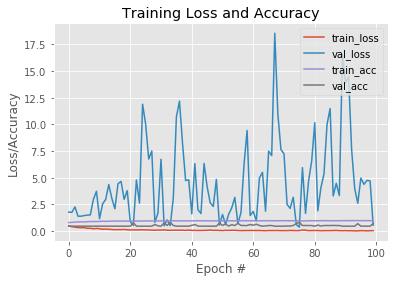

In [38]:
# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')